In [3]:
from SSP import *

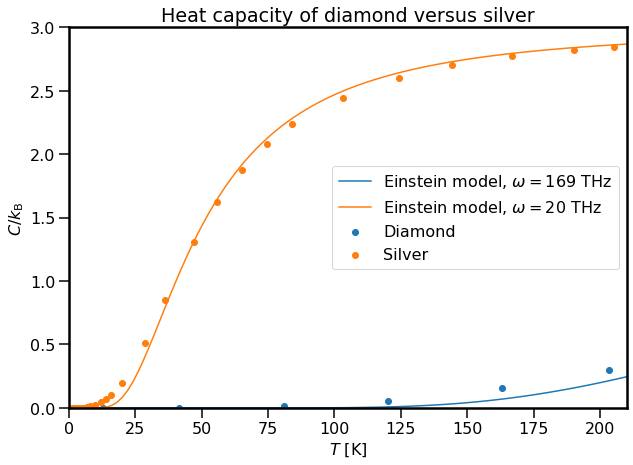

In [69]:
T_c = np.array([222.4, 262.4, 283.7, 306.4, 331.3, 358.5, 413.0, 479.2, 520.0, 879.7, 1079.7, 1258.0])
c_c = np.array([0.384, 0.578, 0.683, 0.798, 0.928, 1.069, 1.343, 1.656, 1.833, 2.671, 2.720, 2.781])

T_cprime = np.array([203.157, 162.867, 120.283, 80.868, 41.319, 12.833])
c_cprime = np.array([0.5881, 0.3083, 0.1124, 0.02762, .00313, 0.000115])
c_cprime *= 4.1858 * 3/24.945 #24.954 is 3Nk_B

T_diamond = np.concatenate((T_cprime, T_c))
c_diamond = np.concatenate((c_cprime, c_c))

T_ag = np.array([1.35,2.,3.,4.,5.,6.,7.,8.,10.,12.,14.,16.,20.,28.56,36.16,47.09,55.88,65.19,74.56,83.91,103.14,124.2,144.38,166.78,190.17,205.3])
c_ag = np.array([0.,0.,0.,0.,0.,0.,0.0719648,0.1075288,0.2100368,0.364008,0.573208,0.866088,1.648496,4.242576,7.07096,10.8784,13.47248,15.60632,17.27992,18.6188,20.33424,21.63128,22.46808,23.05384,23.47224,23.68144])
c_ag *= 3/24.945 #24.954 is 3Nk_B

# Define a function to calculate the heat capacity
def c_einstein(T, w):
    
    """
    Calculate the specific heat capacity according to the Einstein model of a solid
    
    Input:
    ---
    T: Temperature [K]
    w: Einstein frequency \omega [rad.s^-1]
    
    Returns:
    ---
    The heat capacity in units of k_B
    
    """
    
    x = (hbar * w)/(T * kb) # scale the variable
    return 3 * x**2 * np.exp(x) / (np.exp(x) - 1)**2 # compute the heat capacity

# The range of temperatures over which the heat capity will be calculated
# Note: overflow errors will occur is the x_min value is too small
temp = np.linspace(10, 210, 100)

fit = curve_fit(c_einstein, T_ag, c_ag, 1e12)
w_ag = fit[0][0]

fit = curve_fit(c_einstein, T_diamond, c_diamond, 1e12)
w_diamond = fit[0][0]

fig, ax = plt.subplots()
ax.scatter(T_diamond, c_diamond, label='Diamond', color = 'C0')
ax.plot(temp, c_einstein(temp, w_diamond), label=f'Einstein model, $\omega={w_diamond/1e12:.0f}$ THz', color = 'C0')
ax.scatter(T_ag, c_ag, label='Silver', color = 'C1')
ax.plot(temp, c_einstein(temp, w_ag), label=f'Einstein model, $\omega={w_ag/1e12:.0f}$ THz', color = 'C1')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C/k_\mathrm{B}$')
ax.set_ylim((0, 3))
ax.set_xlim((0, 210))
ax.set_title('Heat capacity of diamond versus silver');
ax.legend()

plt.savefig('02_heat_capacity_AgC.svg', facecolor='white', transparent=False)

plt.show()

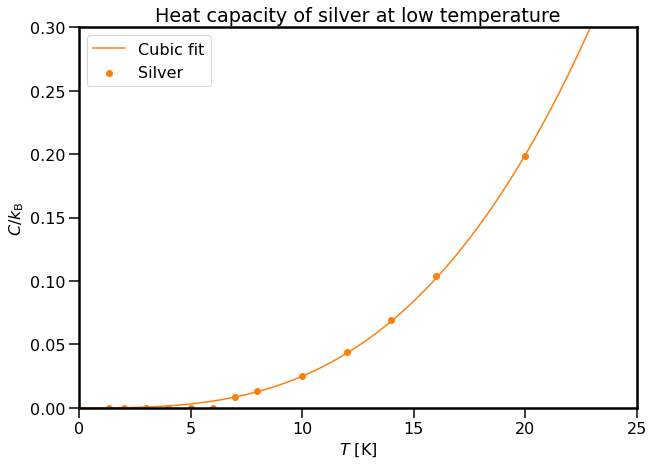

In [70]:
# Import the data from the supplied .csv file
data = pd.read_csv('Heat_capacity_Ag.csv')
data = data[data['T']<25] # take only the low-temperature data

# Define the function to fit (a cubic)
def cubic(x, a):
    return a * x**3 

# The range of temperatures over which the fit will be calculated
temp = np.linspace(0, 25, 100)

fit = curve_fit(cubic, data['T'], data['C']) # perform the fit
a_ag = fit[0][0] # extract the fit parameter

# Make the plot
fig, ax = plt.subplots()
ax.scatter(data['T'], data['C'], label='Silver', color = 'C1')
ax.plot(temp, cubic(temp, a_ag), label=f'Cubic fit', color = 'C1')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C/k_\mathrm{B}$')
ax.set_ylim((0, .3))
ax.set_xlim((0, 25))
ax.set_title('Heat capacity of silver at low temperature');
ax.legend()

plt.savefig('02_heat_capacity_cubic.svg', facecolor='white', transparent=False)

plt.show()

In [84]:
def nasty_function(x):
    return x ** 3 / (np.exp(x) - 1)

val, res = integrate.quad(nasty_function, 0, np.inf)
print(val)

<ipython-input-84-a0ccb6db6172>:2: RuntimeWarning: overflow encountered in exp
  return x ** 3 / (np.exp(x) - 1)


6.49393940226683

In [86]:
val_analytical = np.pi**4 / 15
print(val - val_analytical)

1.7763568394002505e-15


<ipython-input-112-24ad3e7f4a00>:2: RuntimeWarning: overflow encountered in double_scalars
  return y**4 * np.exp(y) / (np.exp(y) - 1)**2


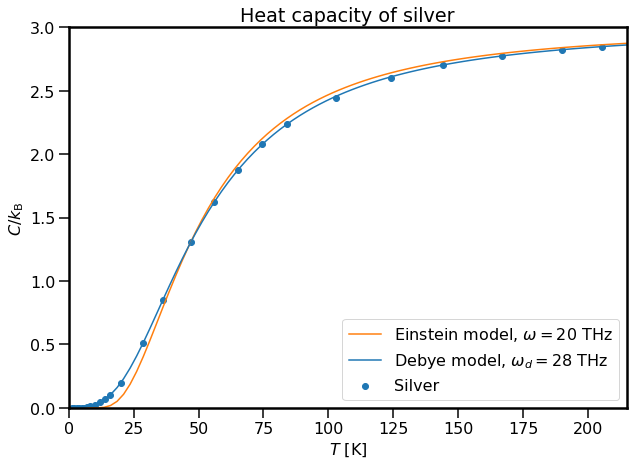

In [112]:
def integrand(y):
    return y**4 * np.exp(y) / (np.exp(y) - 1)**2

@np.vectorize
def c_debye(T, T_D):
    x = T / T_D
    return 9 * x**3 * integrate.quad(integrand, 0, 1/x)[0]

temp = np.linspace(1, 250, 100)

fit = curve_fit(c_debye, T_ag, c_ag, 500)
T_D = fit[0][0]
w_D = kb * T_D/hbar

fig, ax = plt.subplots()
ax.scatter(T_ag, c_ag, label='Silver', color = 'C0')
ax.plot(temp, c_einstein(temp, w_ag), label=f'Einstein model, $\omega={w_ag/1e12:.0f}$ THz', color = 'C1')
ax.plot(temp, c_debye(temp, T_D), label=f'Debye model, $\omega_d={w_D/1e12:.0f}$ THz', color = 'C0')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C/k_\mathrm{B}$')
ax.set_ylim((0, 3))
ax.set_xlim((0, 215))
ax.set_title('Heat capacity of silver');
ax.legend()

plt.savefig('02_heat_capacity_Debye.svg', facecolor='white', transparent=False)

plt.show()

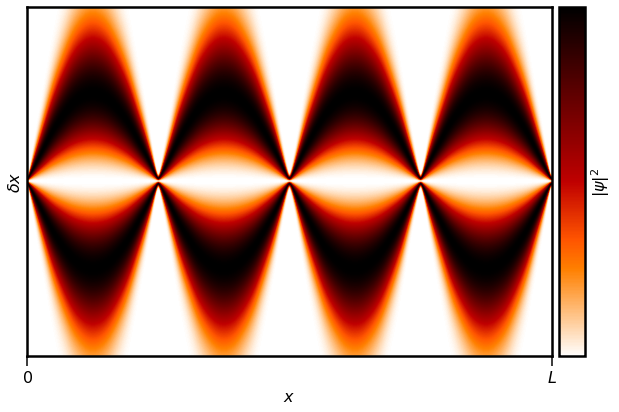

In [128]:
from mpl_toolkits.axes_grid import make_axes_locatable

def psi_squared(delta_x, x):
    factor = np.sin(4*np.pi*x)**2 + .001
    return delta_x**2 * np.exp(-delta_x**2 / factor) / factor

x = np.linspace(0, 1, 500)
delta_x = np.linspace(-2, 2, 500)

# Now to plotting
plt.figure()
ax = plt.gca()
im = ax.imshow(
    psi_squared(delta_x.reshape((-1, 1)), x.reshape((1, -1))),
    cmap='gist_heat_r',
    extent=(0, 3, -1, 1),
)
plt.ylabel(r'$\delta x$')
plt.xlabel(r'$x$')
plt.xticks((0, 3), ('$0$', '$L$'))
plt.yticks((), ())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks(())
cbar.set_label(r'$|\psi|^2$')

plt.savefig('02_Debye_ex1.svg', facecolor='white', transparent=False)

plt.show()